In [31]:
import sys
import scipy
import numpy as np
import pandas as pd
import sklearn

from pandas.plotting import scatter_matrix
from matplotlib import pyplot

#sklearn分类需要的类
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#打分
from sklearn.metrics import accuracy_score
#逻辑回顾算法
from sklearn.linear_model import LogisticRegression
#决策树
from sklearn.tree import DecisionTreeClassifier
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#K近邻算法
from sklearn.neighbors import KNeighborsClassifier
#贝叶斯
from sklearn.naive_bayes import GaussianNB
#支持向量机SVM
from sklearn.svm import SVC

## from https://codeantenna.com/a/vdeWEADWMN

In [11]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

filename = './iris/iris.data'
names=['separ-length','separ-width','petal-length','petal-width','class']
dataset = pd.read_csv(filename, names=names)

In [23]:
# print(dataset.head())
# print(dataset.shape)
print(dataset.groupby('class').size())
print(dataset['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


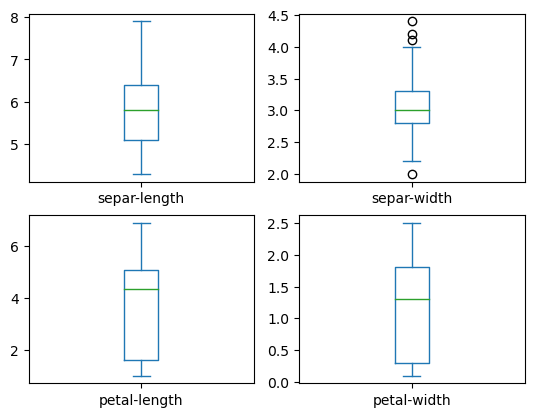

In [26]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

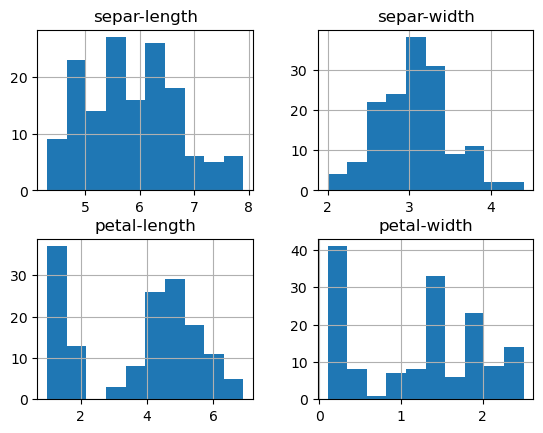

In [27]:
dataset.hist()
pyplot.show()

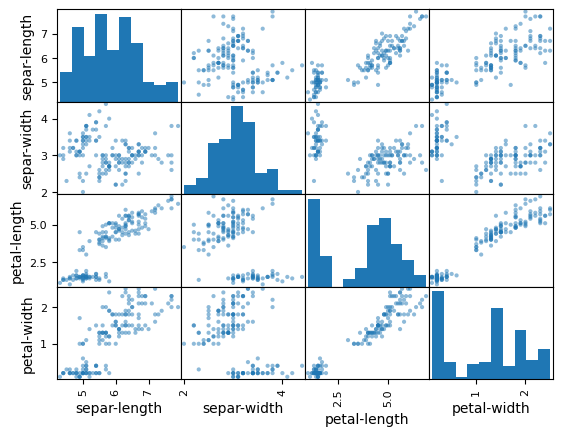

In [28]:
scatter_matrix(dataset)
pyplot.show()

In [35]:
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [45]:
models={}
models['LR']=LogisticRegression()
models['LDA']=LinearDiscriminantAnalysis()
models['KNN']=KNeighborsClassifier()
models['CART']=DecisionTreeClassifier()
models['NB']=GaussianNB()
models['SVM']=SVC()

results = []

for key in models:
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results= (models[key], X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_learn/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_learn/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

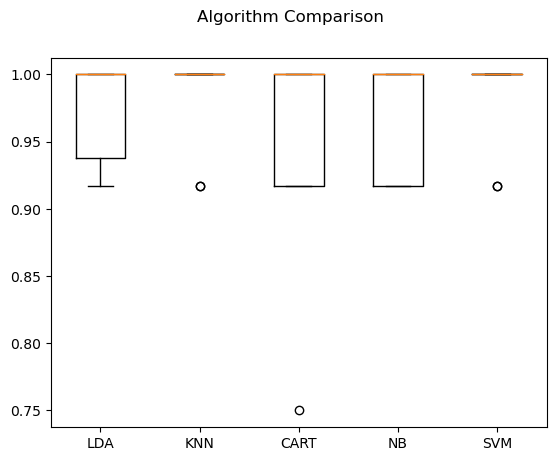

In [42]:
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [43]:
svm=SVC()
svm.fit(X=X_train,y=Y_train)
predictions=svm.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [44]:
knn=KNeighborsClassifier()
knn.fit(X=X_train,y=Y_train)
predictions=knn.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

